<a href="https://colab.research.google.com/github/shashi3876/WordleDifficultyAnalysis/blob/main/AnalyzeWordleUsingOctoparse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import re

In [5]:
# Load the file
tweets1 = pd.read_csv('TwitterWordle1.csv')
tweets2 = pd.read_csv('TwitterWordle2.csv')

# Concatenate the two dataframes
tweets = pd.concat([tweets1, tweets2], ignore_index=True)

In [6]:
tweets.head()

,Query_Str,Post_URL,Author_Name,Author_Web_Page_URL,Author_Handle,Verified_Status,UTC_Time,Ads,Tweet_Content,Post_ID,...,Like_Count,View_Count,Bookmark_Count,Tweet_Image_URL,Replying_to,Reply_to_Whom,Reply_to_Whom_URL,Reply_to_Whom_Username,Reply_to_Whom_Handle,Language
0,Wordle,https://x.com/search?q=Wordle until:2025-01-02...,BarbThePostcardDiva🇺🇦🌈💙,https://x.com/MorBeeK,MorBeeK,False,2025-01-01 20:51:50+00:00,False,"#Wordle1292\n\nWordle 1,292 3/6*\n\n⬜🟨⬜🟨⬜\n🟩⬜⬜...",1874559180348301598,...,31,138,0,https://pbs.twimg.com/media/GgPFmRzaUAA9VDn.jpg,False,NaN,NaN,NaN,NaN,en
1,Wordle,https://x.com/search?q=Wordle until:2025-01-02...,ja-radio(じゃーらじ)📻/JA1JQE,https://x.com/jaradiokids,jaradiokids,False,2025-01-01 21:51:38+00:00,False,"Wordle 1,293 3/6\n🟨🟩⬜⬜🟩\n⬜⬜🟨⬜⬜\n🟩🟩🟩🟩🟩\n🫐🍓🍨 htt...",1874574227963339123,...,19,166,0,https://pbs.twimg.com/media/GgPTU42awAAopeM.jpg,False,NaN,NaN,NaN,NaN,en
2,Wordle,https://x.com/search?q=Wordle until:2025-01-02...,felityy #AlwaysFnatic,https://x.com/felity_,felity_,False,2025-01-01 22:40:03+00:00,False,Wordle Türkçe 1293 5/6\n\n⬛🟩⬛⬛⬛\n⬛🟩⬛🟩⬛\n⬛🟩⬛🟩⬛\...,1874586412181578032,...,2,119,0,NaN,False,NaN,NaN,NaN,NaN,tr
3,Wordle,https://x.com/search?q=Wordle until:2025-01-02...,𝕷𝖎𝖘𝖆🌹,https://x.com/LisaB_17,LisaB_17,False,2025-01-01 23:19:08+00:00,False,"Wordle 1,292 3/6*\n\n⬛⬛⬛⬛🟩\n⬛🟨⬛🟩🟩\n🟩🟩🟩🟩🟩",1874596248327798844,...,95,531,0,NaN,False,NaN,NaN,NaN,NaN,en
4,Wordle,https://x.com/search?q=Wordle until:2025-01-02...,Wendy Brennan🇦🇺,https://x.com/wabrennan7,wabrennan7,False,2025-01-01 21:39:55+00:00,False,"Good morning. Phew🥵. Take care.\nWordle 1,293 ...",1874571280059597307,...,45,119,0,NaN,False,NaN,NaN,NaN,NaN,en


In [7]:
len(tweets)

30000

In [8]:
# Code to extract the Wordle part and the number of attempts that took to solve the puzzle
wordleRegex = re.compile(r'Wordle \d,\d\d\d [\dX]/6')

def processTweets(tweets_df):
    tweets=tweets_df[['Tweet_Content','UTC_Time']]
    tweets['Wordle']=tweets.Tweet_Content.apply(findWordleReg)
    tweets=tweets[tweets['Wordle']!='None']
    tweets['version']=tweets.Wordle.str[7:12].str.replace(",", "").astype(int)
    tweets['attempts']=tweets.Wordle.str[-3]
    return tweets


def findWordleReg(tweet_ans):
    mo=wordleRegex.search(tweet_ans)
    if mo!=None:
        return mo.group()
    else:
        return 'None'

In [9]:
tweets_df = processTweets(tweets)

/tmp/ipython-input-1438737951.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Wordle']=tweets.Tweet_Content.apply(findWordleReg)


In [10]:
# Convert to datetime
tweets_df["UTC_Time"] = pd.to_datetime(tweets_df["UTC_Time"], utc=True)

# Extract just the date
tweets_df["Date"] = tweets_df["UTC_Time"].dt.date
tweets_df.head()

,Tweet_Content,UTC_Time,Wordle,version,attempts,Date
0,"#Wordle1292\n\nWordle 1,292 3/6*\n\n⬜🟨⬜🟨⬜\n🟩⬜⬜...",2025-01-01 20:51:50+00:00,"Wordle 1,292 3/6",1292,3,2025-01-01
1,"Wordle 1,293 3/6\n🟨🟩⬜⬜🟩\n⬜⬜🟨⬜⬜\n🟩🟩🟩🟩🟩\n🫐🍓🍨 htt...",2025-01-01 21:51:38+00:00,"Wordle 1,293 3/6",1293,3,2025-01-01
3,"Wordle 1,292 3/6*\n\n⬛⬛⬛⬛🟩\n⬛🟨⬛🟩🟩\n🟩🟩🟩🟩🟩",2025-01-01 23:19:08+00:00,"Wordle 1,292 3/6",1292,3,2025-01-01
4,"Good morning. Phew🥵. Take care.\nWordle 1,293 ...",2025-01-01 21:39:55+00:00,"Wordle 1,293 6/6",1293,6,2025-01-01
5,"good morning\n#wordle1293\nWordle 1,293 5/6\n\...",2025-01-01 22:33:14+00:00,"Wordle 1,293 5/6",1293,5,2025-01-01


In [11]:
from collections import Counter

tweets_df["attempts"] = tweets_df["attempts"].astype(str)

# --- 1. Total number of rows per version ---
total_rows = tweets_df.groupby("version").size().rename("total_rows")

# --- 2. Most common date ---
most_common_date = (
    tweets_df.groupby("version")["Date"]
      .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
      .rename("most_common_date")
)

# --- 3. Average attempts excluding "X" ---
df_numeric_attempts = tweets_df[tweets_df["attempts"] != "X"].copy()
df_numeric_attempts["attempts"] = df_numeric_attempts["attempts"].astype(int)

avg_attempts = (
    df_numeric_attempts.groupby("version")["attempts"].mean()
    .rename("avg_attempts")
)

# --- 4. Count of 1s, 2s, ..., 6s, X ---
attempt_counts = (
    tweets_df.groupby(["version", "attempts"]).size().unstack(fill_value=0)
)

# --- Combine everything ---
result = (
    pd.concat([total_rows, most_common_date, avg_attempts], axis=1)
    .join(attempt_counts, how="left")
    .fillna(0)
)

result['success_rate'] = (result['total_rows']-result['X']) / result['total_rows']*100
result = result.sort_values(by="version")

In [12]:
result


,total_rows,most_common_date,avg_attempts,1,2,3,4,5,6,X,success_rate
version,,,,,,,,,,,
1171,1,2025-01-05,0.000000,0,0,0,0,0,0,1,0.000000
1283,1,2025-01-01,5.000000,0,0,0,0,1,0,0,100.000000
1289,1,2025-01-03,5.000000,0,0,0,0,1,0,0,100.000000
1290,1,2025-02-03,5.000000,0,0,0,0,1,0,0,100.000000
1292,53,2025-01-01,4.018868,0,3,15,16,16,3,0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
1510,56,2025-08-06,3.750000,0,3,18,26,8,1,0,100.000000
1511,61,2025-08-07,4.114754,0,1,15,23,20,2,0,100.000000
1512,676,2025-08-09,3.995529,4,38,157,276,150,46,5,99.260355


In [13]:
result.head(20)

,total_rows,most_common_date,avg_attempts,1,2,3,4,5,6,X,success_rate
version,,,,,,,,,,,
1171,1,2025-01-05,0.000000,0,0,0,0,0,0,1,0.000000
1283,1,2025-01-01,5.000000,0,0,0,0,1,0,0,100.000000
1289,1,2025-01-03,5.000000,0,0,0,0,1,0,0,100.000000
1290,1,2025-02-03,5.000000,0,0,0,0,1,0,0,100.000000
1292,53,2025-01-01,4.018868,0,3,15,16,16,3,0,100.000000
1293,139,2025-01-01,3.467626,0,19,57,46,13,4,0,100.000000
1294,89,2025-01-02,3.471910,0,15,33,28,10,3,0,100.000000
1295,80,2025-01-04,4.115385,1,5,16,28,18,10,2,97.500000
1296,104,2025-01-04,4.474747,0,4,11,38,26,20,5,95.192308


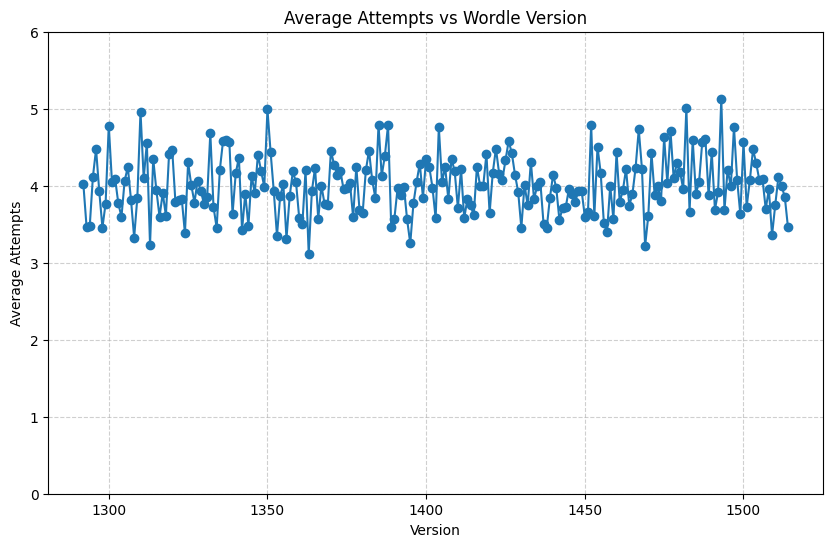

In [14]:
import matplotlib.pyplot as plt

# Make sure version is numeric for sorting (if not already)
result = result.reset_index()
result = result[result["version"]>=1292]
result["version"] = result["version"].astype(int)

# Sort by version
result = result.sort_values(by="version")

# Plot avg_attempts vs version
plt.figure(figsize=(10, 6))
plt.plot(result["version"], result["avg_attempts"], marker="o", linestyle="-")

plt.xlabel("Version")
plt.ylabel("Average Attempts")
plt.title("Average Attempts vs Wordle Version")
plt.ylim(0, 6)  # y-axis between 0 and 6
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

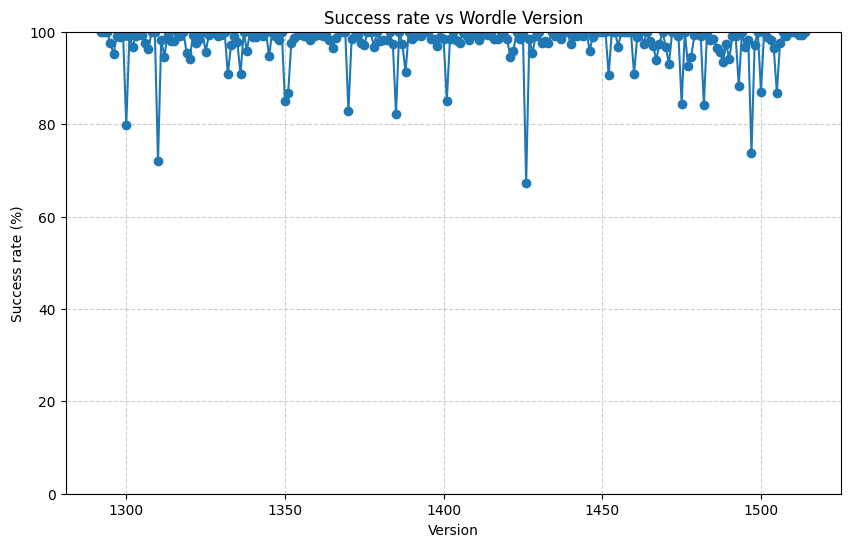

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(result["version"], result["success_rate"], marker="o", linestyle="-")

plt.xlabel("Version")
plt.ylabel("Success rate (%)")
plt.title("Success rate vs Wordle Version")
plt.ylim(0, 100)  # y-axis between 0 and 6
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

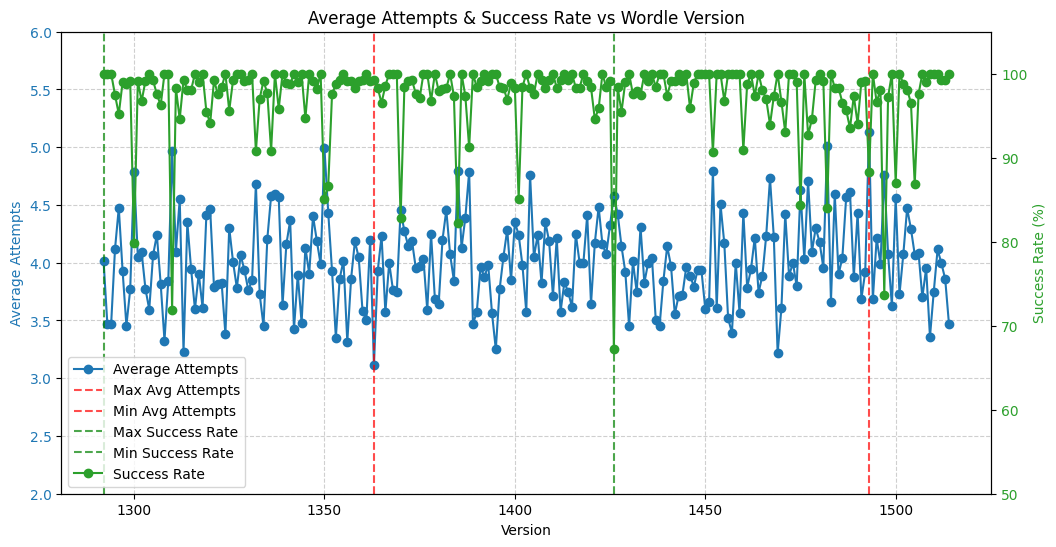

In [16]:
import matplotlib.pyplot as plt

# --- Create figure and axes ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis: avg_attempts
color1 = "tab:blue"
ax1.set_xlabel("Version")
ax1.set_ylabel("Average Attempts", color=color1)
ax1.plot(result["version"], result["avg_attempts"], marker="o", linestyle="-", color=color1, label="Average Attempts")
ax1.tick_params(axis="y", labelcolor=color1)
ax1.set_ylim(2, 6)

# Right y-axis: success_rate
ax2 = ax1.twinx()
color2 = "tab:green"
ax2.set_ylabel("Success Rate (%)", color=color2)
ax2.plot(result["version"], result["success_rate"], marker="o", linestyle="-", color=color2, label="Success Rate")
ax2.tick_params(axis="y", labelcolor=color2)
ax2.set_ylim(50, 105)

# --- Find min/max for both metrics ---
max_attempts_idx = result["avg_attempts"].idxmax()
min_attempts_idx = result["avg_attempts"].idxmin()
max_success_idx = result["success_rate"].idxmax()
min_success_idx = result["success_rate"].idxmin()

# Vertical lines
for idx, metric, color in [
    (max_attempts_idx, "Max Avg Attempts", "red"),
    (min_attempts_idx, "Min Avg Attempts", "red"),
    (max_success_idx, "Max Success Rate", "green"),
    (min_success_idx, "Min Success Rate", "green"),
]:
    x_val = result.loc[idx, "version"]
    ax1.axvline(x=x_val, color=color, linestyle="--", alpha=0.7, label=metric)

# Title and grid
plt.title("Average Attempts & Success Rate vs Wordle Version")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.grid(True, which="both", linestyle="--", alpha=0.6)#

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower left")

plt.show()

In [17]:
# --- Identify hardest and easiest Wordles ---

hardest_by_attempts = result.loc[result["avg_attempts"].idxmax(), "version"]
easiest_by_attempts = result.loc[result["avg_attempts"].idxmin(), "version"]

hardest_by_success = result.loc[result["success_rate"].idxmin(), "version"]
easiest_by_success = result.loc[result["success_rate"].idxmax(), "version"]

print("Hardest Wordles:")
print(f" - By Avg Attempts (highest): Version {hardest_by_attempts}")
print(f" - By Success Rate (lowest): Version {hardest_by_success}")

print("\nEasiest Wordles:")
print(f" - By Avg Attempts (lowest): Version {easiest_by_attempts}")
print(f" - By Success Rate (highest): Version {easiest_by_success}")

Hardest Wordles:
 - By Avg Attempts (highest): Version 1493
 - By Success Rate (lowest): Version 1426

Easiest Wordles:
 - By Avg Attempts (lowest): Version 1363
 - By Success Rate (highest): Version 1292
